In [ ]:
# Kelas C

#  anggota :
# 1. Arya Bisma Putra Refman (5027241036)
# 2. Muhammad Ziddan Habibi (5027241122)
# 3. Dira Muhammad Ilyas Shafar Anwar (5027241033)
# 4. Naila Cahyarani Idelia (5027241063)
# 5. Erlinda Annisa Zahra (5027241108)

In [34]:
import pandas as pd

# Membaca file Excel
file_excel = 'Dataset.xlsx'  # Ganti dengan path ke file XLSX kamu
data = pd.read_excel(file_excel)

# Fungsi untuk menghitung mean
def hitung_mean(dataframe, kolom):
    if kolom in dataframe.columns:
        total = 0
        count = 0
        
        for nilai in dataframe[kolom]:
            if pd.notna(nilai):
                total += nilai
                count += 1
        
        if count == 0:
            return 0
        
        return total / count
    else:
        raise ValueError(f"Kolom '{kolom}' tidak ditemukan dalam DataFrame.")

# Fungsi untuk menghitung median
def hitung_median(dataframe, kolom):
    if kolom in dataframe.columns:
        valid_nilai = [nilai for nilai in dataframe[kolom] if pd.notna(nilai)]
        valid_nilai.sort()
        
        count = len(valid_nilai)
        if count == 0:
            return 0
        if count % 2 == 1:
            return valid_nilai[count // 2]
        else:
            mid1 = valid_nilai[count // 2 - 1]
            mid2 = valid_nilai[count // 2]
            return (mid1 + mid2) / 2
    else:
        raise ValueError(f"Kolom '{kolom}' tidak ditemukan dalam DataFrame.")

# Fungsi untuk menghitung modus
def hitung_modus(dataframe, kolom):
    if kolom in dataframe.columns:
        frekuensi = {}
        for nilai in dataframe[kolom]:
            if pd.notna(nilai):
                if nilai in frekuensi:
                    frekuensi[nilai] += 1
                else:
                    frekuensi[nilai] = 1
        modus = max(frekuensi, key=frekuensi.get)
        return modus
    else:
        raise ValueError(f"Kolom '{kolom}' tidak ditemukan dalam DataFrame.")

# Fungsi untuk menghitung range
def hitung_range(dataframe, kolom):
    if kolom in dataframe.columns:
        valid_nilai = [nilai for nilai in dataframe[kolom] if pd.notna(nilai)]
        return max(valid_nilai) - min(valid_nilai) if valid_nilai else 0
    else:
        raise ValueError(f"Kolom '{kolom}' tidak ditemukan dalam DataFrame.")

# Fungsi untuk menghitung IQR
def hitung_iqr(dataframe, kolom):
    if kolom in dataframe.columns:
        valid_nilai = [nilai for nilai in dataframe[kolom] if pd.notna(nilai)]
        valid_nilai.sort()
        q1 = valid_nilai[int(len(valid_nilai) * 0.25)]
        q3 = valid_nilai[int(len(valid_nilai) * 0.75)]
        return q3 - q1
    else:
        raise ValueError(f"Kolom '{kolom}' tidak ditemukan dalam DataFrame.")

# Fungsi untuk menghitung varian
def hitung_varian(dataframe, kolom):
    if kolom in dataframe.columns:
        mean = hitung_mean(dataframe, kolom)
        valid_nilai = [nilai for nilai in dataframe[kolom] if pd.notna(nilai)]
        return sum((nilai - mean) ** 2 for nilai in valid_nilai) / len(valid_nilai) if valid_nilai else 0
    else:
        raise ValueError(f"Kolom '{kolom}' tidak ditemukan dalam DataFrame.")

# Fungsi untuk menghitung standar deviasi
def hitung_std_deviasi(dataframe, kolom):
    if kolom in dataframe.columns:
        varian = hitung_varian(dataframe, kolom)
        return varian ** 0.5
    else:
        raise ValueError(f"Kolom '{kolom}' tidak ditemukan dalam DataFrame.")

# Fungsi untuk menghitung skewness
def hitung_skewness(dataframe, kolom):
    if kolom in dataframe.columns:
        mean = hitung_mean(dataframe, kolom)
        std_dev = hitung_std_deviasi(dataframe, kolom)
        valid_nilai = [nilai for nilai in dataframe[kolom] if pd.notna(nilai)]
        
        n = len(valid_nilai)
        if n == 0:
            return 0
        
        skewness = (n / ((n - 1) * (n - 2))) * sum(((nilai - mean) / std_dev) ** 3 for nilai in valid_nilai)
        return skewness
    else:
        raise ValueError(f"Kolom '{kolom}' tidak ditemukan dalam DataFrame.")

# Fungsi untuk menghitung kurtosis
def hitung_kurtosis(dataframe, kolom):
    if kolom in dataframe.columns:
        mean = hitung_mean(dataframe, kolom)
        std_dev = hitung_std_deviasi(dataframe, kolom)
        valid_nilai = [nilai for nilai in dataframe[kolom] if pd.notna(nilai)]
        
        n = len(valid_nilai)
        if n == 0:
            return 0
        
        kurtosis = (n * (n + 1) * sum(((nilai - mean) / std_dev) * 4 for nilai in valid_nilai) - 3 * (n - 1) * 2) / ((n - 1) * (n - 2) * (n - 3))
        return kurtosis
    else:
        raise ValueError(f"Kolom '{kolom}' tidak ditemukan dalam DataFrame.")

# Menggunakan fungsi untuk menghitung nilai statistik
kolom_penjualan_a = 'Penjualan A (pcs)'
kolom_penjualan_b = 'Penjualan B (pcs)'

# Membuat header untuk output
print(f"{'Statistik':<30} {'Penjualan A (pcs)':<20} {'Penjualan B (pcs)':<20}")
print("-" * 70)

# Menghitung dan mencetak hasil untuk Penjualan A
print(f"{'Mean':<30} {hitung_mean(data, kolom_penjualan_a):<20.2f} {hitung_mean(data, kolom_penjualan_b):<20.2f}")
print(f"{'Median':<30} {hitung_median(data, kolom_penjualan_a):<20.2f} {hitung_median(data, kolom_penjualan_b):<20.2f}")
print(f"{'Modus':<30} {hitung_modus(data, kolom_penjualan_a):<20} {hitung_modus(data, kolom_penjualan_b):<20}")
print(f"{'Range':<30} {hitung_range(data, kolom_penjualan_a):<20.2f} {hitung_range(data, kolom_penjualan_b):<20.2f}")
print(f"{'IQR':<30} {hitung_iqr(data, kolom_penjualan_a):<20.2f} {hitung_iqr(data, kolom_penjualan_b):<20.2f}")
print(f"{'Varian':<30} {hitung_varian(data, kolom_penjualan_a):<20.2f} {hitung_varian(data, kolom_penjualan_b):<20.2f}")
print(f"{'Standar Deviasi':<30} {hitung_std_deviasi(data, kolom_penjualan_a):<20.2f} {hitung_std_deviasi(data, kolom_penjualan_b):<20.2f}")
print(f"{'Skewness':<30} {hitung_skewness(data, kolom_penjualan_a):<20.2f} {hitung_skewness(data, kolom_penjualan_b):<20.2f}")
print(f"{'Kurtosis':<30} {hitung_kurtosis(data, kolom_penjualan_a):<20.2f} {hitung_kurtosis(data, kolom_penjualan_b):<20.2f}")

Statistik                      Penjualan A (pcs)    Penjualan B (pcs)   
----------------------------------------------------------------------
Mean                           131.83               205.55              
Median                         52.00                157.00              
Modus                          0                    0                   
Range                          458.00               545.00              
IQR                            233.00               244.00              
Varian                         19883.97             25415.45            
Standar Deviasi                141.01               159.42              
Skewness                       0.72                 0.61                
Kurtosis                       -0.00                -0.00               


Tabel Distribusi Frekuensi Penjualan A:
      Interval  Frekuensi  Persentase (%)
(-0.458, 45.8]         59           48.76
  (45.8, 91.6]          5            4.13
 (91.6, 137.4]          4            3.31
(137.4, 183.2]          8            6.61
(183.2, 229.0]         14           11.57
(229.0, 274.8]          7            5.79
(274.8, 320.6]          9            7.44
(320.6, 366.4]          4            3.31
(366.4, 412.2]          6            4.96
(412.2, 458.0]          5            4.13

Tabel Distribusi Frekuensi Penjualan B:
      Interval  Frekuensi  Persentase (%)
(-0.545, 54.5]         25           20.66
 (54.5, 109.0]         14           11.57
(109.0, 163.5]         23           19.01
(163.5, 218.0]         10            8.26
(218.0, 272.5]         11            9.09
(272.5, 327.0]          8            6.61
(327.0, 381.5]          7            5.79
(381.5, 436.0]          9            7.44
(436.0, 490.5]          7            5.79
(490.5, 545.0]          7            

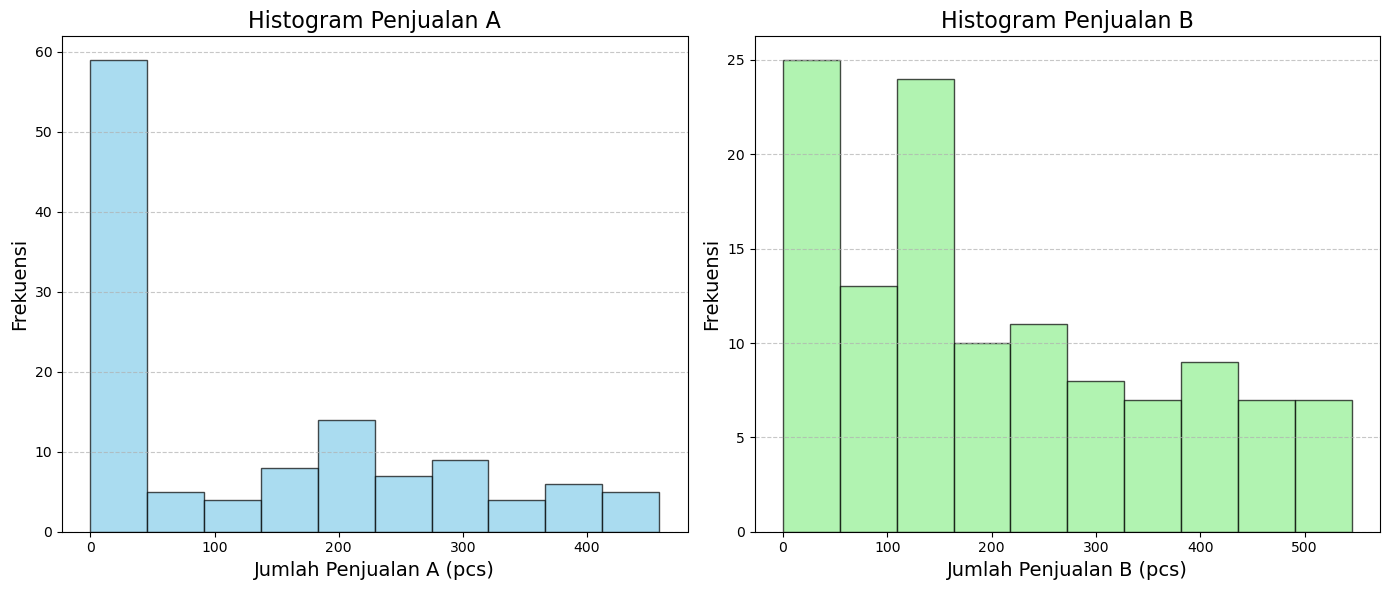

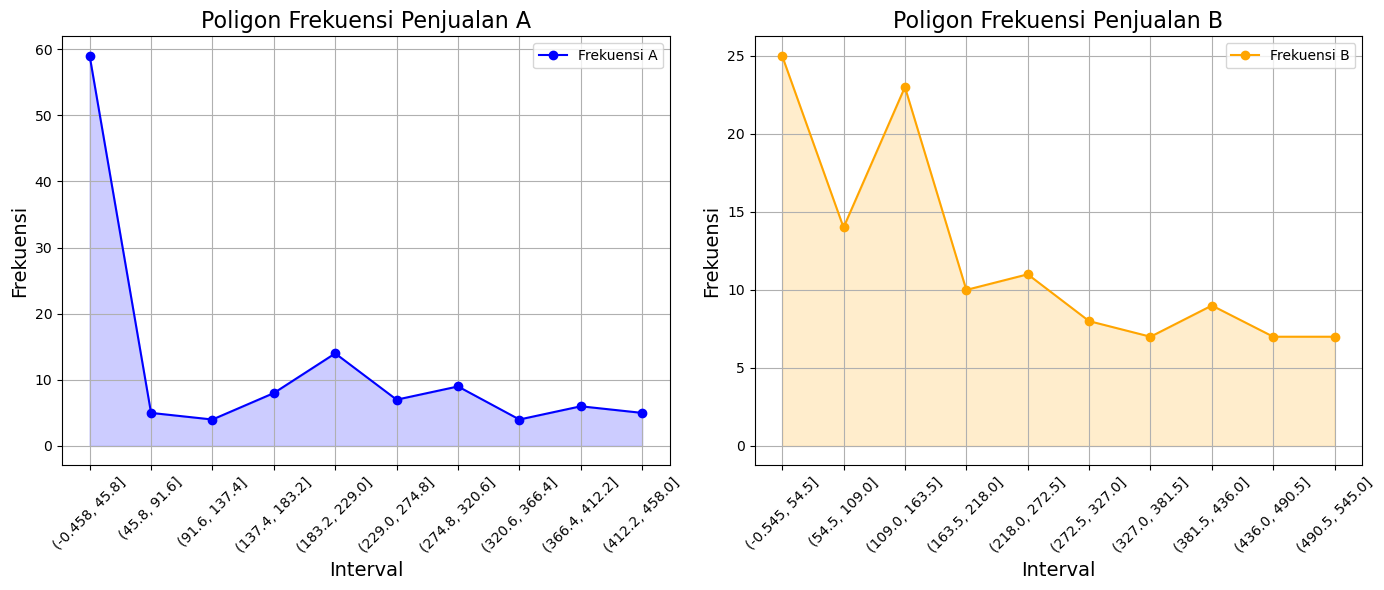

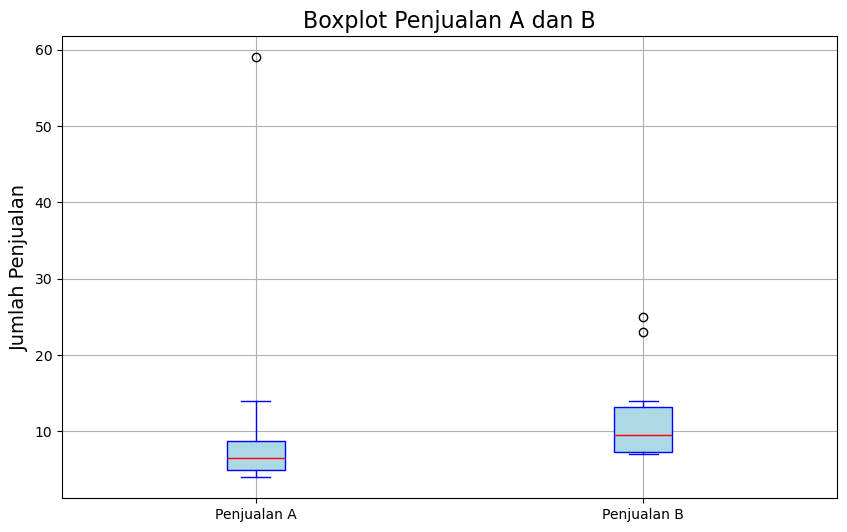

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi untuk membuat tabel distribusi frekuensi
def tabel_distribusi_frekuensi(dataframe, kolom, interval):
    # Menghitung frekuensi
    frekuensi, bins = pd.cut(dataframe[kolom], bins=interval, retbins=True)
    distribusi_frekuensi = frekuensi.value_counts().sort_index()
    
    # Membuat DataFrame untuk tabel distribusi frekuensi
    tabel = pd.DataFrame({
        'Interval': distribusi_frekuensi.index.astype(str),
        'Frekuensi': distribusi_frekuensi.values
    })
    
    # Menghitung persentase
    tabel['Persentase (%)'] = (tabel['Frekuensi'] / tabel['Frekuensi'].sum() * 100).round(2)
    
    # Mengatur format tabel
    tabel['Frekuensi'] = tabel['Frekuensi'].astype(int)  # Mengubah frekuensi ke integer
    return tabel

# Contoh data; pastikan Anda mengganti 'data', 'kolom_penjualan_a', dan 'kolom_penjualan_b' sesuai data Anda
# data = pd.read_excel('data.xlsx')  # Contoh membaca file data
# kolom_penjualan_a = 'Nama_Kolom_A'  # Ganti dengan nama kolom yang sesuai
# kolom_penjualan_b = 'Nama_Kolom_B'  # Ganti dengan nama kolom yang sesuai

# Menghitung tabel distribusi frekuensi untuk Penjualan A dan B
interval = 10  # Misalnya, interval kelas sebesar 10
tabel_a = tabel_distribusi_frekuensi(data, kolom_penjualan_a, interval)
tabel_b = tabel_distribusi_frekuensi(data, kolom_penjualan_b, interval)

# Menampilkan tabel distribusi frekuensi
print("Tabel Distribusi Frekuensi Penjualan A:")
print(tabel_a.to_string(index=False))
print("\nTabel Distribusi Frekuensi Penjualan B:")
print(tabel_b.to_string(index=False))

# Membuat Histogram
plt.figure(figsize=(14, 6))

# Histogram untuk Penjualan A
plt.subplot(1, 2, 1)
plt.hist(data[kolom_penjualan_a].dropna(), bins=interval, edgecolor='black', color='skyblue', alpha=0.7)
plt.title('Histogram Penjualan A', fontsize=16)
plt.xlabel('Jumlah Penjualan A (pcs)', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Histogram untuk Penjualan B
plt.subplot(1, 2, 2)
plt.hist(data[kolom_penjualan_b].dropna(), bins=interval, edgecolor='black', color='lightgreen', alpha=0.7)
plt.title('Histogram Penjualan B', fontsize=16)
plt.xlabel('Jumlah Penjualan B (pcs)', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Membuat Poligon Frekuensi
plt.figure(figsize=(14, 6))

# Poligon frekuensi untuk Penjualan A
plt.subplot(1, 2, 1)
frekuensi_a = tabel_a['Frekuensi']
plt.plot(tabel_a['Interval'], frekuensi_a, marker='o', linestyle='-', color='blue', label='Frekuensi A')
plt.fill_between(tabel_a['Interval'], frekuensi_a, alpha=0.2, color='blue')
plt.title('Poligon Frekuensi Penjualan A', fontsize=16)
plt.xlabel('Interval', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.grid()
plt.xticks(rotation=45)  # Rotasi label interval pada sumbu X
plt.legend()

# Poligon frekuensi untuk Penjualan B
plt.subplot(1, 2, 2)
frekuensi_b = tabel_b['Frekuensi']
plt.plot(tabel_b['Interval'], frekuensi_b, marker='o', linestyle='-', color='orange', label='Frekuensi B')
plt.fill_between(tabel_b['Interval'], frekuensi_b, alpha=0.2, color='orange')
plt.title('Poligon Frekuensi Penjualan B', fontsize=16)
plt.xlabel('Interval', fontsize=14)
plt.ylabel('Frekuensi', fontsize=14)
plt.grid()
plt.xticks(rotation=45)  # Rotasi label interval pada sumbu X
plt.legend()

plt.tight_layout()  # Mengatur layout agar tidak saling tumpang tindih

import matplotlib.pyplot as plt

# Data Penjualan A dan B
data_a = tabel_a['Frekuensi']
data_b = tabel_b['Frekuensi']

# Membuat Boxplot
plt.figure(figsize=(10, 6))

plt.boxplot([data_a, data_b], labels=['Penjualan A', 'Penjualan B'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'))

# Menambahkan Judul dan Label
plt.title('Boxplot Penjualan A dan B', fontsize=16)
plt.ylabel('Jumlah Penjualan', fontsize=14)
plt.grid()

# Menampilkan Plot
plt.show()


#plt.tight_layout()
plt.show()

In [ ]:
# Fungsi Boxplot:
# Boxplot (box-and-whisker plot) adalah representasi grafis dari distribusi data yang menggambarkan persebaran
# serta ringkasan deskriptif data secara visual. Beberapa poin penting yang diilustrasikan oleh boxplot:
# - Median (garis di tengah kotak): Menunjukkan nilai tengah data.
# - Kotak (Interquartile Range - IQR): Membentang dari kuartil pertama (Q1) hingga kuartil ketiga (Q3),
#   mencakup 50% data tengah.
# - Whiskers (garis keluar dari kotak): Menunjukkan jangkauan data yang dianggap tidak terlalu ekstrem,
#   biasanya dihitung sebagai 1,5 kali IQR dari Q1 dan Q3.
# - Outliers (titik di luar whiskers): Titik data yang dianggap sangat berbeda dari nilai lainnya dalam dataset
#   dan berada jauh dari whiskers.

# Perbedaan dengan Histogram:
# 1. Visualisasi:
# - Boxplot: Menyediakan rangkuman deskriptif data (median, kuartil, outliers) dan memperlihatkan persebaran serta
#   adanya outliers.
# - Histogram: Menunjukkan distribusi frekuensi suatu data dengan memetakan jumlah kemunculan data di interval tertentu (bin).
#   Histogram lebih fokus pada penyebaran frekuensi daripada ringkasan deskriptif.

# 2. Tipe Informasi:
# - Boxplot: Fokus pada statistik ringkasan (median, kuartil, IQR, outliers).
# - Histogram: Fokus pada pola distribusi frekuensi (misal distribusi normal atau miring).

# 3. Outliers:
# - Boxplot: Secara eksplisit menunjukkan outliers dengan titik yang berada di luar whiskers.
# - Histogram: Tidak secara eksplisit menunjukkan outliers, hanya memperlihatkan distribusi data dalam bentuk bar.

# Interpretasi Outlier:
# Dari boxplot, terlihat ada beberapa outliers pada kedua set data, baik untuk Penjualan A maupun Penjualan B:
# - Penjualan A memiliki outlier yang sangat ekstrem, yaitu satu titik data di sekitar angka 60,
#   jauh lebih besar dari mayoritas data lainnya yang berkisar di bawah 15.
# - Penjualan B juga memiliki beberapa outliers, namun nilainya tidak setinggi Penjualan A. Outliers Penjualan B
#   berada di sekitar angka 20-25.
# - Outlier pada data penjualan bisa terjadi karena beberapa alasan, seperti adanya transaksi penjualan yang luar biasa tinggi
#   di beberapa periode tertentu atau kesalahan pencatatan. Dalam kasus ini, outlier perlu diperiksa lebih lanjut,
#   apakah mencerminkan kejadian aktual atau kesalahan data.

# Kesimpulan:
# 1. Persebaran Data:
# - Penjualan A memiliki persebaran data yang lebih lebar dibandingkan Penjualan B, terlihat dari whiskers yang lebih panjang.
#   Sebagian besar data Penjualan A berada di bawah angka 10, dengan satu outlier yang sangat besar di angka 60.
# - Penjualan B menunjukkan persebaran data yang lebih terpusat, dengan nilai frekuensi berada dalam rentang 10-15,
#   serta beberapa outliers di atas angka tersebut.

# 2. Outliers:
# - Penjualan A memiliki outlier yang sangat ekstrem. Ini bisa menjadi indikasi adanya event khusus atau penjualan
#   yang luar biasa di salah satu periode.
# - Penjualan B memiliki beberapa outliers yang tidak terlalu ekstrem, namun tetap signifikan.

# 3. Bentuk Distribusi:
# - Distribusi Penjualan A tampak miring ke kanan (right-skewed) karena mayoritas data berada di sisi kiri,
#   dan terdapat outlier besar yang menarik distribusi ke kanan.
# - Distribusi Penjualan B lebih simetris, namun tetap memiliki beberapa outliers di bagian atas distribusi.

# Dengan analisis ini, tampak bahwa Penjualan A memiliki variasi yang lebih besar, termasuk adanya penjualan luar biasa
# tinggi di satu periode tertentu, sedangkan Penjualan B lebih terpusat dengan penyebaran yang lebih moderat dan stabil.